In [134]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [140]:
original_df = pd.read_csv('./csv/original.csv')

### Keep Useful Colums

In [142]:
useful_df = original_df[['characteristics_bedrooms', 'characteristics_bathrooms', 'characteristics_garages',
                'characteristics_area', 'location_lat', 'location_lng', 'price', 'neighborhood_name', 'district_name', 'extras_Terreno']]

In [156]:
useful_df.shape

(1213, 10)

### Watch for null values

In [146]:
missing_values = useful_df.isnull().sum()
print(missing_values)

characteristics_bedrooms       0
characteristics_bathrooms      0
characteristics_garages        0
characteristics_area           0
location_lat                   0
location_lng                   0
price                          0
neighborhood_name            369
district_name                364
extras_Terreno               208
dtype: int64


### Rellenar los valores nulos

In [148]:
useful_df.loc[useful_df['extras_Terreno'].isnull(), 'extras_Terreno'] = useful_df['characteristics_area']
useful_df.loc[useful_df['neighborhood_name'].isnull(), 'neighborhood_name'] = 'Desconocido'
useful_df.loc[useful_df['district_name'].isnull(), 'district_name'] = 'Desconocido'

In [152]:
print(useful_df.isnull().sum())

characteristics_bedrooms     0
characteristics_bathrooms    0
characteristics_garages      0
characteristics_area         0
location_lat                 0
location_lng                 0
price                        0
neighborhood_name            0
district_name                0
extras_Terreno               0
dtype: int64


### Descripción de las columnas numéricas

In [359]:
print(useful_df.describe())

       characteristics_bedrooms  characteristics_bathrooms  \
count               1213.000000                1213.000000   
mean                   4.028030                   3.406430   
std                    1.990706                   1.730294   
min                    0.000000                   0.000000   
25%                    3.000000                   2.000000   
50%                    3.000000                   3.000000   
75%                    4.000000                   4.000000   
max                   23.000000                  15.000000   

       characteristics_garages  characteristics_area  location_lat  \
count              1213.000000           1213.000000   1213.000000   
mean                  1.797197            285.392951    -17.759124   
std                   1.773036            617.990847      0.067196   
min                   0.000000              0.000000    -18.343662   
25%                   0.000000            145.000000    -17.797045   
50%                  

### One hot encoding

In [69]:
dummies = pd.get_dummies(useful_df[['neighborhood_name', 'district_name']])
dummies.head()

,neighborhood_name_BARRIO EQUIPETROL,neighborhood_name_BARRIO PRIMAVERA,neighborhood_name_BARRIO URBARI,neighborhood_name_BARRIO VICTORIA,neighborhood_name_Barrio 25 De Junio,neighborhood_name_Barrio 27 de mayo,neighborhood_name_Barrio 5 de Noviembre,neighborhood_name_Barrio Aeronautico,neighborhood_name_Barrio California,neighborhood_name_Barrio Casa Nova II,...,district_name_Distrito 13,district_name_Distrito 2,district_name_Distrito 5,district_name_Distrito 6,district_name_Distrito 7,district_name_Distrito 8,district_name_Distrito 9Â,district_name_Distrito Municipal 1,district_name_Distrito Municipal 3,district_name_Distrito Municipal 4Â
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [225]:
useful_df_dummies = pd.concat([useful_df.drop(['neighborhood_name', 'district_name'], axis=1), dummies], axis=1)

### Histogramas 

array([[<Axes: title={'center': 'characteristics_bedrooms'}>,
        <Axes: title={'center': 'characteristics_bathrooms'}>,
        <Axes: title={'center': 'characteristics_garages'}>],
       [<Axes: title={'center': 'characteristics_area'}>,
        <Axes: title={'center': 'location_lat'}>,
        <Axes: title={'center': 'location_lng'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'extras_Terreno'}>, <Axes: >]],
      dtype=object)

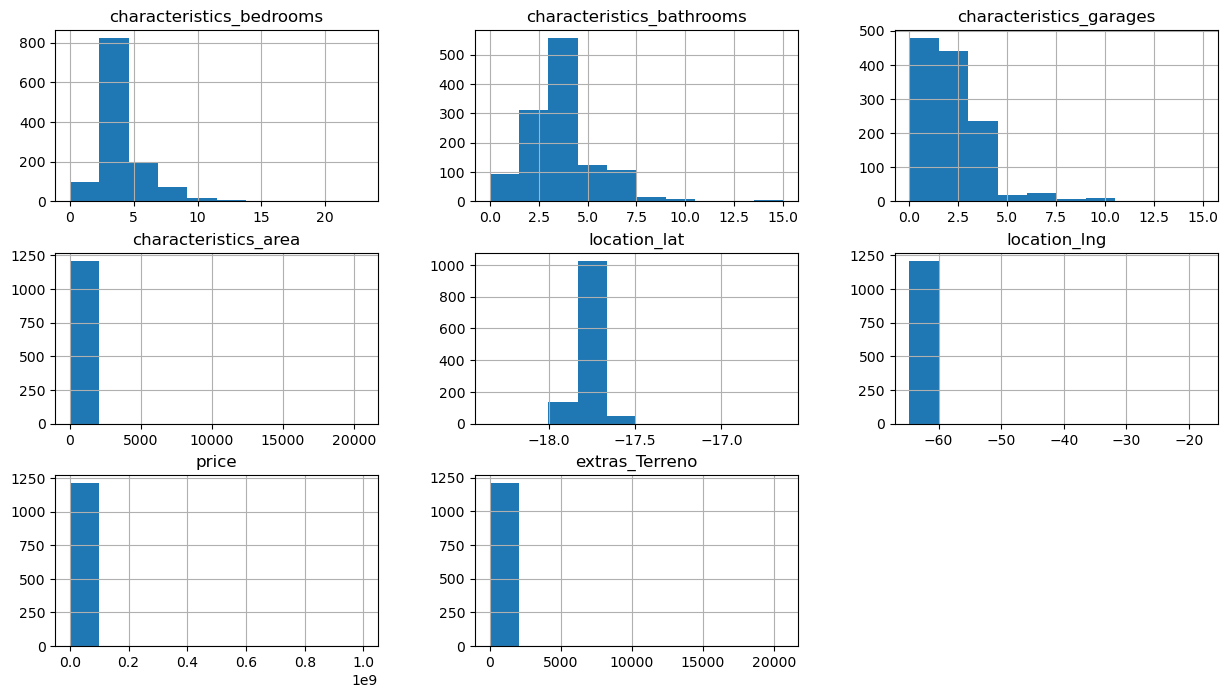

In [17]:
useful_df.hist(figsize=(15,8))

# Limpieza de datos

In [204]:
useful_df_clean.shape

(921, 10)

In [164]:
useful_df_clean = useful_df[(useful_df['characteristics_area'] > 0) &
                (useful_df['characteristics_bedrooms'] > 0) &
                (useful_df['characteristics_bathrooms'] > 0) & (useful_df['extras_Terreno'] > 0)]

In [166]:
upper_limit_price = useful_df_clean['price'].quantile(0.99)
useful_df_clean = useful_df_clean[useful_df_clean['price'] <= upper_limit_price]

In [170]:
upper_limit_area = useful_df_clean['characteristics_area'].quantile(0.99)
useful_df_clean = useful_df_clean[useful_df_clean['characteristics_area'] <= upper_limit_area]

In [174]:
upper_limit_area = useful_df_clean['extras_Terreno'].quantile(0.99)
useful_df_clean = useful_df_clean[useful_df_clean['extras_Terreno'] <= upper_limit_area]

In [178]:
useful_df_clean = useful_df_clean[useful_df_clean['price'] >= 50000]

In [182]:
useful_df_clean = useful_df_clean[(useful_df_clean['characteristics_area'] >= 100) &
                          (useful_df_clean['characteristics_area'] <= 1000)]

In [186]:
useful_df_clean = useful_df_clean[(useful_df_clean['extras_Terreno'] >= 100) &
                          (useful_df_clean['extras_Terreno'] <= 1000)]

In [190]:
useful_df_clean = useful_df_clean[useful_df_clean['characteristics_bedrooms'] <= 8]

In [194]:
useful_df_clean = useful_df_clean[useful_df_clean['characteristics_bathrooms'] <= 8]

In [198]:
useful_df_clean = useful_df_clean[useful_df_clean['characteristics_garages'] <= 8]

In [214]:
useful_df_clean = useful_df_clean.drop_duplicates(subset=['location_lat', 'location_lng'], keep='first')

# Verificar si los duplicados fueron eliminados
print(useful_df_clean[['location_lat', 'location_lng']].duplicated().sum())

0


In [220]:
# Suponiendo que tienes tus datos en un DataFrame llamado df
# Verificamos valores que están fuera del rango esperado
valores_anomalos = useful_df_clean[(useful_df_clean['location_lng'] < -64) | (useful_df_clean['location_lng'] > -62)]
print(valores_anomalos)

Empty DataFrame
Columns: [characteristics_bedrooms, characteristics_bathrooms, characteristics_garages, characteristics_area, location_lat, location_lng, price, neighborhood_name, district_name, extras_Terreno]
Index: []


In [ ]:
# Eliminar la fila con el índice 1087
useful_df_clean = useful_df_clean.drop(index=1087)

# Verificar si la fila ha sido eliminada
print(useful_df_clean.loc[1087])  # Esto debería dar un error si la fila ha sido eliminada correctamente


In [208]:
print(useful_df_clean.describe())


       characteristics_bedrooms  characteristics_bathrooms  \
count                921.000000                 921.000000   
mean                   3.896851                   3.454940   
std                    1.235877                   1.341795   
min                    1.000000                   1.000000   
25%                    3.000000                   2.000000   
50%                    4.000000                   3.000000   
75%                    4.000000                   4.000000   
max                    8.000000                   8.000000   

       characteristics_garages  characteristics_area  location_lat  \
count               921.000000            921.000000    921.000000   
mean                  1.794788            263.343464    -17.758911   
std                   1.460425            131.728760      0.052503   
min                   0.000000            100.000000    -17.897238   
25%                   0.000000            165.000000    -17.793102   
50%                  

In [223]:
useful_df_clean.shape

(920, 10)

# Heat Map

In [225]:
heat_df_1 = useful_df_clean[['characteristics_bedrooms', 'characteristics_bathrooms', 'characteristics_garages',
                'characteristics_area', 'location_lat', 'location_lng', 'price', 'extras_Terreno']]

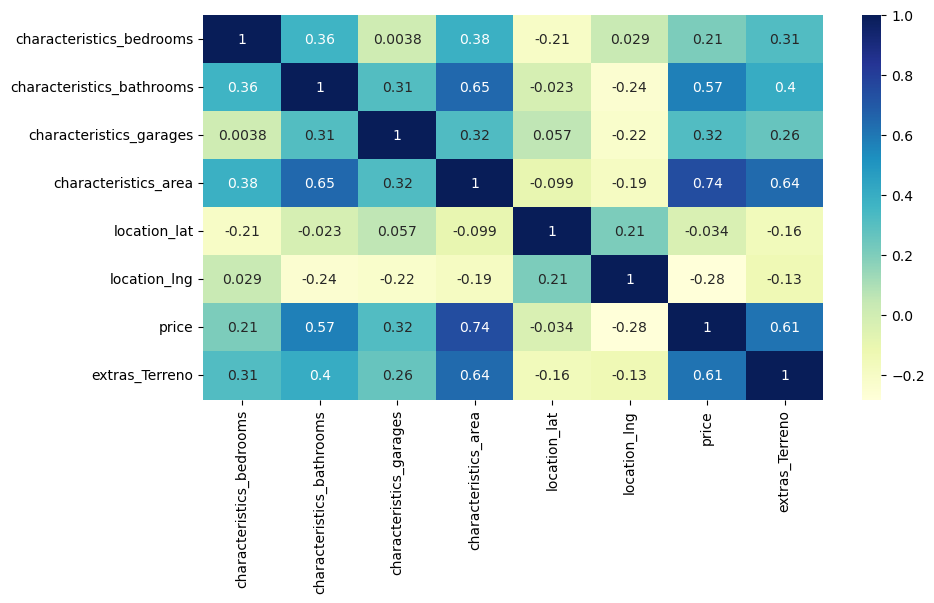

In [227]:
plt.figure(figsize=(10, 5))  # Aumenta el tamaño de la figura
sns.heatmap(heat_df_1.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Feature Engineering

In [229]:
useful_df_ft = useful_df_clean.copy()

In [231]:
useful_df_ft.loc[:, 'price_per_m2'] = useful_df_ft['price'] / useful_df_ft['characteristics_area']
useful_df_ft.loc[:, 'rooms_per_area'] = useful_df_ft['characteristics_area'] * useful_df_ft['extras_Terreno']

In [233]:
heat_df_1 = useful_df_ft[['characteristics_bedrooms', 'characteristics_bathrooms', 'characteristics_garages',
                'characteristics_area', 'location_lat', 'location_lng', 'price', 'extras_Terreno', 'price_per_m2', 'rooms_per_area']]

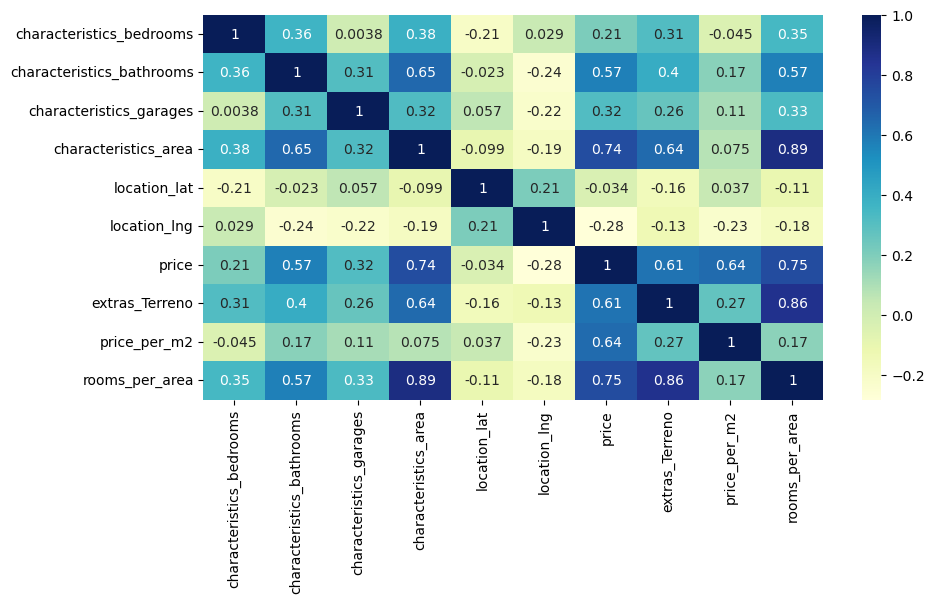

In [235]:
plt.figure(figsize=(10, 5))  # Aumenta el tamaño de la figura
sns.heatmap(heat_df_1.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [241]:
useful_df_ft_2 = useful_df_ft.copy()


In [101]:

dummies = pd.get_dummies(useful_df_ft_2[['neighborhood_name', 'district_name']])
dummies.head()

useful_df_ft_2_dummies = pd.concat([useful_df_ft_2.drop(['neighborhood_name', 'district_name'], axis=1), dummies], axis=1)

In [57]:
# Calcular la correlación con el precio
corr = useful_df_ft_2_dummies.corr()

# Ver las correlaciones de las columnas relacionadas con distrito y barrio con el precio
print(corr['price'].filter(like='district_name'))
print(corr['price'].filter(like='neighborhood_name'))

district_name_Desconocido               0.132382
district_name_Distrito 10              -0.071713
district_name_Distrito 11               0.095298
district_name_Distrito 12              -0.134613
district_name_Distrito 2                0.011781
district_name_Distrito 5               -0.009139
district_name_Distrito 6               -0.242638
district_name_Distrito 7               -0.177575
district_name_Distrito 8               -0.145568
district_name_Distrito 9Â              -0.113900
district_name_Distrito Municipal 1      0.184253
district_name_Distrito Municipal 3     -0.020811
district_name_Distrito Municipal 4Â     0.084876
Name: price, dtype: float64
neighborhood_name_BARRIO EQUIPETROL                0.084096
neighborhood_name_BARRIO PRIMAVERA                -0.021322
neighborhood_name_BARRIO URBARI                    0.094864
neighborhood_name_BARRIO VICTORIA                  0.001782
neighborhood_name_Barrio 25 De Junio              -0.058566
neighborhood_name_Barrio 27 de mayo

In [105]:
# Calcular el precio medio por distrito
district_avg_price = useful_df_ft_2.groupby('district_name')['price'].mean()

# Agregar esa información de precio medio al DataFrame original
useful_df_ft_2['district_avg_price'] = useful_df_ft_2['district_name'].map(district_avg_price)

# Verificar la correlación con el precio
print(useful_df_ft_2[['district_avg_price', 'price']].corr())

                    district_avg_price     price
district_avg_price            1.000000  0.449736
price                         0.449736  1.000000


In [103]:
# Calcular el precio medio por distrito
neighborhood_avg_price = useful_df_ft_2.groupby('neighborhood_name')['price'].mean()

# Agregar esa información de precio medio al DataFrame original
useful_df_ft_2['neighborhood_avg_price'] = useful_df_ft_2['neighborhood_name'].map(neighborhood_avg_price)

# Verificar la correlación con el precio
print(useful_df_ft_2[['neighborhood_avg_price', 'price']].corr())

                        neighborhood_avg_price     price
neighborhood_avg_price                1.000000  0.484879
price                                 0.484879  1.000000


In [243]:
useful_df_ft_2.columns

Index(['characteristics_bedrooms', 'characteristics_bathrooms',
       'characteristics_garages', 'characteristics_area', 'location_lat',
       'location_lng', 'price', 'neighborhood_name', 'district_name',
       'extras_Terreno', 'price_per_m2', 'rooms_per_area'],
      dtype='object')

In [256]:
heat_df_1 = filtered_df[['characteristics_bedrooms', 'characteristics_bathrooms', 'characteristics_garages',
                'characteristics_area', 'location_lat', 'location_lng', 'price', 'extras_Terreno', 'price_per_m2']]

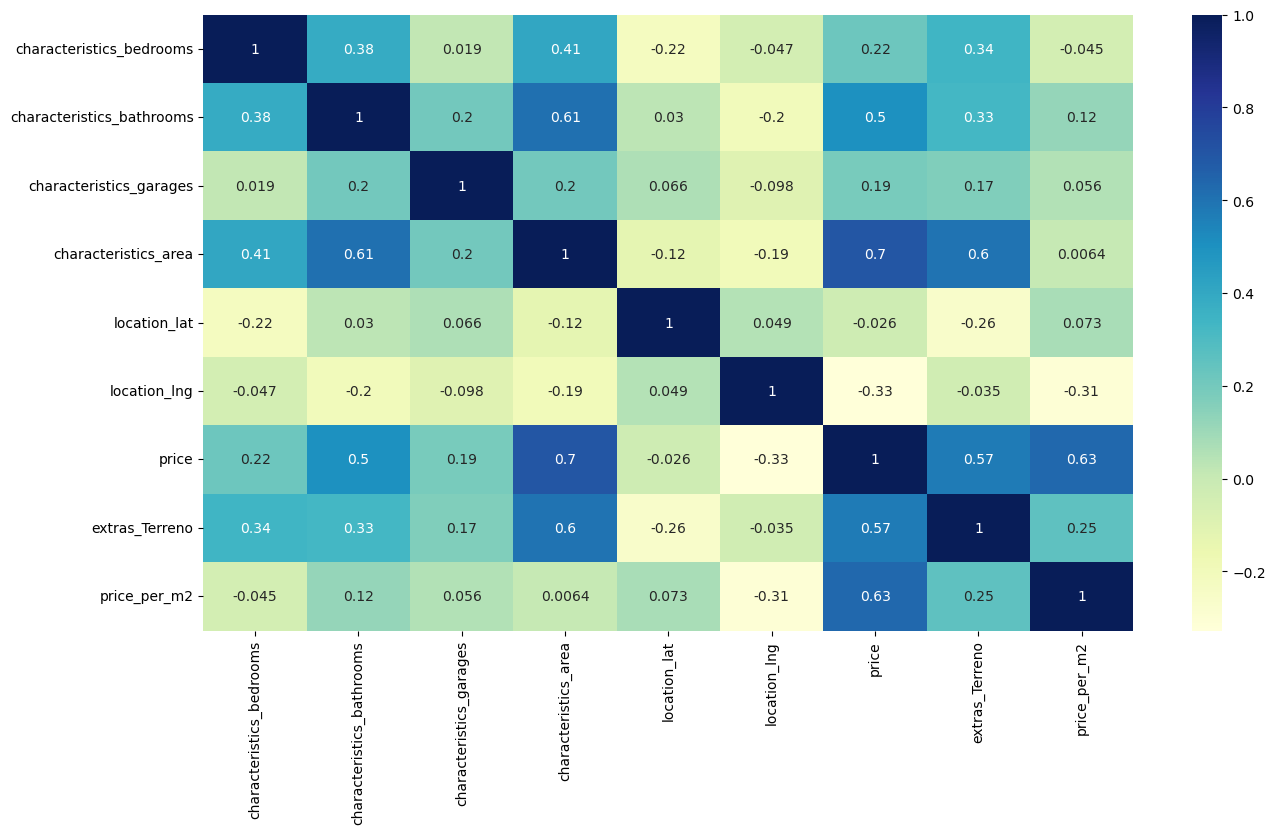

In [258]:
plt.figure(figsize=(15, 8))  # Aumenta el tamaño de la figura
sns.heatmap(heat_df_1.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [245]:
filtered_df = useful_df_ft_2[useful_df_ft_2['neighborhood_name'] != 'Desconocido']

In [249]:
useful_df_ft_2.shape

(920, 12)

In [247]:
filtered_df.shape

(675, 12)

In [251]:
filtered_df.to_csv('for_price_m2_model.csv')

In [253]:
useful_df_ft_2.to_csv('for_no_price_m2_model.csv')

In [261]:
neighborhood_price_per_m2_df = filtered_df.groupby('neighborhood_name')['price_per_m2'].mean().reset_index()

In [265]:
neighborhood_price_per_m2_df.head(50)

,neighborhood_name,price_per_m2
0,BARRIO EQUIPETROL,1117.330203
1,BARRIO PRIMAVERA,654.358495
2,BARRIO URBARI,984.053341
3,BARRIO VICTORIA,991.670904
4,Barrio 25 De Junio,512.569970
5,Barrio 27 de mayo,647.963183
6,Barrio 5 de Noviembre,559.246096
7,Barrio Aeronautico,777.019231
8,Barrio California,621.605012
9,Barrio Casa Nova II,362.777218


In [97]:
neighborhood_price_per_m2_df.to_csv('neighborhood_price_per_m2_df.csv', index=False)